In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def euler(vi, yi, h):
    
    """
    """
    yi_plus_1 = yi + h*vi
    vi_plus_1 = vi -20*h*yi
    
    return vi_plus_1, yi_plus_1

In [3]:
def rk4(vi, yi, h):
    
    """
    """
    Y1 = vi
    Y2 = vi + (h/2)*Y1
    Y3 = vi + (h/2)*Y2
    Y4 = vi + h*Y3
    
    V1 = -20*yi
    V2 = -20*(yi + (h/2)*V1)
    V3 = -20*(yi + (h/2)*V2)
    V4 = -20*(yi + h*V3)
    
    yi_plus_1 = yi + (h/6)*(Y1 + 2*Y2 + 2*Y3 + Y4)
    vi_plus_1 = vi + (h/6)*(V1 + 2*V2 + 2*V3 + V4)
    
    return vi_plus_1, yi_plus_1

In [4]:
def evaluate_v_and_y(h, method):
    
    """ h -step size in seconds
    """
    max_t = 2.5
    steps = np.int64(max_t/h) +1     # total number of steps

    y = np.zeros(steps)
    v = np.zeros(steps)

    # store initial values in numpy arrays
    y[0] = 0.7
    v[0] = 0


    for i in np.arange(steps-1):
        v[i+1], y[i+1] = method(v[i], y[i], h)
    
    return v, y

In [10]:
def v_and_y_analytic(t=np.arange(0,2.6,0.01)):
    
    """ returns two functions v and y according to the analytic formula
    """
    y0 = 0.7
    v0 = 0
    k = 40
    m = 2
    w = np.sqrt(k/m)
    sin_wt = np.sin(w*t)
    cos_wt = np.cos(w*t)
    
    v = v0*cos_wt - y0*w*sin_wt
    y = y0*cos_wt + (v0/w)*sin_wt
    
    return v, y

In [12]:
def plot(functions, title=None, save_name=None):
    
    """ functions is a dictionary in the form of function_label:function
    """
    
    plt.figure(figsize=(16,9))
    
    for label, func in functions.items():
        steps = len(func)
        t = np.linspace(0,2.5,steps)
        plt.plot(t, func, label=label)
    
    plt.legend()
    plt.title(title, fontdict={"size":18})
    plt.grid()
    if save_name:
        plt.savefig(f"{save_name}.png")
    else:
        plt.show()

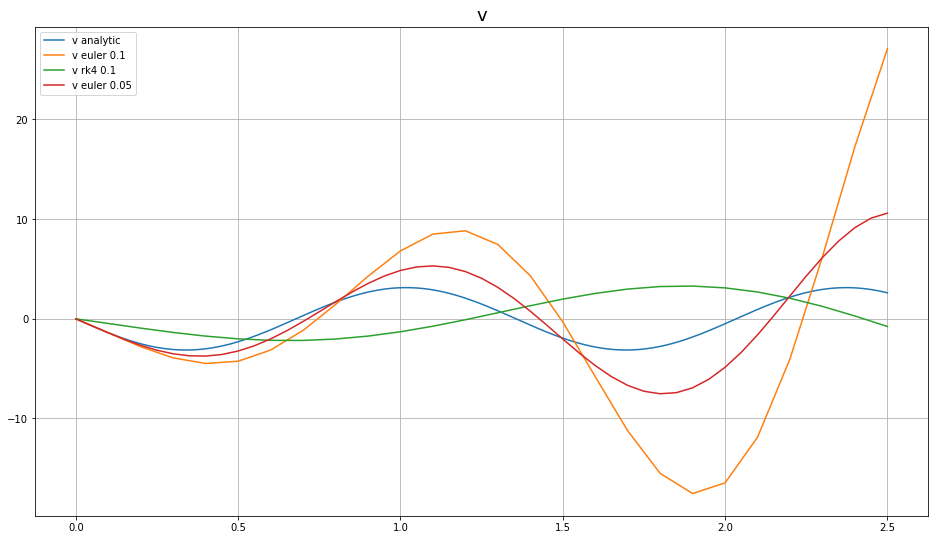

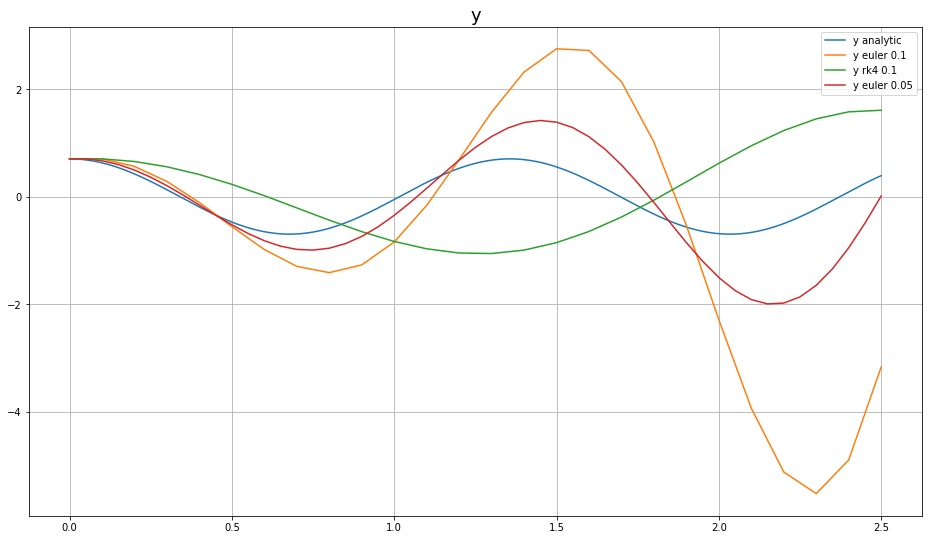

In [15]:
v_euler,y_euler = evaluate_v_and_y(0.1, euler)
v_euler2,y_euler2 = evaluate_v_and_y(0.05, euler)
v_rk,y_rk = evaluate_v_and_y(0.1, rk4)
v_analytic, y_analytic = v_and_y_analytic()
v_funcs = {"v analytic": v_analytic, "v euler 0.1": v_euler, "v rk4 0.1": v_rk, "v euler 0.05": v_euler2}
y_funcs = {"y analytic": y_analytic, "y euler 0.1": y_euler, "y rk4 0.1": y_rk, "y euler 0.05": y_euler2}
plot(v_funcs, title="v")
plot(y_funcs, title="y")